In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('f2.csv')
data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [4]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [5]:
#checking unique values
data.nunique()

Temparature    21
Humidity       34
Moisture       41
Soil_Type       5
Crop_Type      17
Nitrogen       47
Potassium      31
Phosphorous    36
Fertilizer     14
dtype: int64

In [6]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [7]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [8]:
data['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [9]:
#statistical parameters
data.describe(include='all')

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
count,552.000000,552.000000,552.000000,552,552,552.000000,552.000000,552.000000,552
unique,NaN,NaN,NaN,5,17,NaN,NaN,NaN,14
top,NaN,NaN,NaN,Loamy,Cotton,NaN,NaN,NaN,Urea
freq,NaN,NaN,NaN,192,64,NaN,NaN,NaN,108
mean,28.630435,64.557971,42.840580,NaN,NaN,28.521739,10.144928,21.115942,NaN
std,5.088082,11.880236,11.507275,NaN,NaN,29.121989,13.456956,14.920514,NaN
min,0.000000,50.000000,25.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,26.000000,54.000000,33.000000,NaN,NaN,10.000000,0.000000,8.000000,NaN
50%,29.000000,62.000000,41.000000,NaN,NaN,15.000000,0.000000,20.000000,NaN
75%,32.000000,68.000000,51.000000,NaN,NaN,37.000000,18.000000,36.000000,NaN


In [10]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [11]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [12]:
#encoding Fertilizer variable
encode_ferti = LabelEncoder()

#fitting the label encoder
data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [13]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.drop('Fertilizer',axis=1),data.Fertilizer,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (441, 8), y_train = (441,), x_test = (111, 8), y_test = (111,)


In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 213 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  441 non-null    int64
 1   Humidity     441 non-null    int64
 2   Moisture     441 non-null    int64
 3   Soil_Type    441 non-null    int32
 4   Crop_Type    441 non-null    int32
 5   Nitrogen     441 non-null    int64
 6   Potassium    441 non-null    int64
 7   Phosphorous  441 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 27.6 KB


In [16]:
# #importing libraries
# # DecisionTree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report
# from sklearn import metrics
# import warnings

# warnings.filterwarnings('ignore')

# # Ensure x_train, y_train, x_test, y_test are defined before this step

# # Initialize lists
# acc = []
# acc1 = []
# model = []

# # Train Decision Tree model
# ds = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
# ds.fit(x_train, y_train)

# # Accuracy on test data
# predicted_values_test = ds.predict(x_test)
# test_accuracy = metrics.accuracy_score(y_test, predicted_values_test)
# acc.append(test_accuracy)
# model.append('Decision Tree')

# # Accuracy on training data
# predicted_values_train = ds.predict(x_train)
# train_accuracy = metrics.accuracy_score(y_train, predicted_values_train)
# acc1.append(train_accuracy)

# print("Decision Tree's Accuracy on Test Set: ", test_accuracy * 100)
# print("Decision Tree's Accuracy on Train Set: ", train_accuracy * 100)

# # Print classification report for test data
# print(classification_report(y_test, predicted_values_test))


Decision Tree's Accuracy on Test Set:  90.09009009009009
Decision Tree's Accuracy on Train Set:  93.42403628117914
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.92      0.75      0.83        16
           9       0.00      0.00      0.00         1
          10       0.33      1.00      0.50         2
          11       0.00      0.00      0.00         3
          12       0.64      1.00      0.78         7
          13       1.00      0.94      0.97        18

    accuracy                           0.90       111
   macro avg       

In [19]:
# # Importing libraries
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report
# from sklearn import metrics
# import warnings

# warnings.filterwarnings('ignore')

# # Ensure x_train, y_train, x_test, y_test are defined before this step

# # Initialize lists
# acc = []
# acc1 = []
# model = []

# # Train Naïve Bayes model
# nb = GaussianNB()
# nb.fit(x_train, y_train)

# # Accuracy on test data
# predicted_values_test = nb.predict(x_test)
# test_accuracy = metrics.accuracy_score(y_test, predicted_values_test)
# acc.append(test_accuracy)
# model.append('Naïve Bayes')

# # Accuracy on training data
# predicted_values_train = nb.predict(x_train)
# train_accuracy = metrics.accuracy_score(y_train, predicted_values_train)
# acc1.append(train_accuracy)

# print("Naïve Bayes Accuracy on Test Set: ", test_accuracy * 100)
# print("Naïve Bayes Accuracy on Train Set: ", train_accuracy * 100)

# # Print classification report for test data
# print(classification_report(y_test, predicted_values_test))


Naïve Bayes Accuracy on Test Set:  94.5945945945946
Naïve Bayes Accuracy on Train Set:  91.38321995464852
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.88      0.88      0.88        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.60      1.00      0.75         3
          12       0.75      0.86      0.80         7
          13       1.00      0.83      0.91        18

    accuracy                           0.95       111
   macro avg       0.94     

In [20]:
# # Importing libraries
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report
# from sklearn import metrics
# import warnings

# warnings.filterwarnings('ignore')

# # Ensure x_train, y_train, x_test, y_test are defined before this step

# # Initialize lists
# acc = []
# acc1 = []
# model = []

# # Train SVC model
# svc = SVC(kernel='linear', random_state=2)  # You can change the kernel ('linear', 'rbf', 'poly', etc.)
# svc.fit(x_train, y_train)

# # Accuracy on test data
# predicted_values_test = svc.predict(x_test)
# test_accuracy = metrics.accuracy_score(y_test, predicted_values_test)
# acc.append(test_accuracy)
# model.append('SVC')

# # Accuracy on training data
# predicted_values_train = svc.predict(x_train)
# train_accuracy = metrics.accuracy_score(y_train, predicted_values_train)
# acc1.append(train_accuracy)

# print("SVC Accuracy on Test Set: ", test_accuracy * 100)
# print("SVC Accuracy on Train Set: ", train_accuracy * 100)

# # Print classification report for test data
# print(classification_report(y_test, predicted_values_test))


SVC Accuracy on Test Set:  100.0
SVC Accuracy on Train Set:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        18

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg 

In [21]:
# # Importing libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report
# from sklearn import metrics
# import warnings

# warnings.filterwarnings('ignore')

# # Ensure x_train, y_train, x_test, y_test are defined before this step

# # Initialize lists
# acc = []
# acc1 = []
# model = []

# # Train Random Forest model
# rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=2, max_depth=5)
# rf.fit(x_train, y_train)

# # Accuracy on test data
# predicted_values_test = rf.predict(x_test)
# test_accuracy = metrics.accuracy_score(y_test, predicted_values_test)
# acc.append(test_accuracy)
# model.append('Random Forest')

# # Accuracy on training data
# predicted_values_train = rf.predict(x_train)
# train_accuracy = metrics.accuracy_score(y_train, predicted_values_train)
# acc1.append(train_accuracy)

# print("Random Forest Accuracy on Test Set: ", test_accuracy * 100)
# print("Random Forest Accuracy on Train Set: ", train_accuracy * 100)

# # Print classification report for test data
# print(classification_report(y_test, predicted_values_test))


Random Forest Accuracy on Test Set:  99.09909909909909
Random Forest Accuracy on Train Set:  99.31972789115646
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        14
           8       0.94      1.00      0.97        16
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        18

    accuracy                           0.99       111
   macro avg       0.92

In [23]:
# # Importing required libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

# # Ensure `data` and `data.Fertilizer` are defined correctly before using them

# # Define models
# RF = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=2, max_depth=5)
# SVM = SVC(kernel='linear', random_state=2)
# NaiveBayes = GaussianNB()
# ds = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# # Perform cross-validation
# score = cross_val_score(RF, data.drop(columns=['Fertilizer']), data.Fertilizer, cv=5)
# print("Cross-validation score of RF is:", score)

# score = cross_val_score(SVM, data.drop(columns=['Fertilizer']), data.Fertilizer, cv=5)
# print("Cross-validation score of SVM is:", score)

# score = cross_val_score(NaiveBayes, data.drop(columns=['Fertilizer']), data.Fertilizer, cv=5)
# print("Cross-validation score of NaiveBayes is:", score)

# score = cross_val_score(ds, data.drop(columns=['Fertilizer']), data.Fertilizer, cv=5)
# print("Cross-validation score of Decision Tree is:", score)


Cross-validation score of RF is: [0.99099099 0.88288288 0.96363636 1.         0.94545455]
Cross-validation score of SVM is: [1. 1. 1. 1. 1.]
Cross-validation score of NaiveBayes is: [0.91891892 0.85585586 0.9        0.97272727 0.89090909]
Cross-validation score of Decision Tree is: [0.92792793 0.84684685 0.91818182 0.93636364 0.89090909]


Accuracy Values: [0.990990990990991, 1.0, 0.9459459459459459, 0.9009009009009009]
Model Names: ['Random Forest', 'SVC', 'Naïve Bayes', 'Decision Tree']


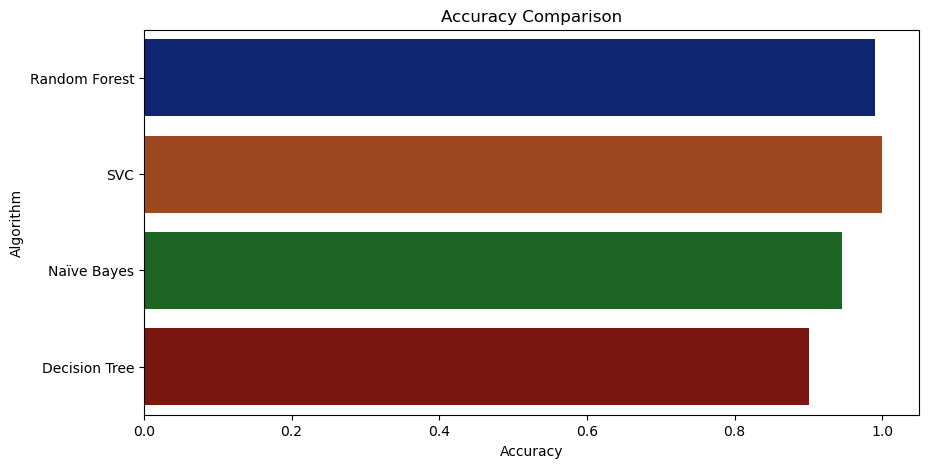

In [28]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

# Ensure x_train, y_train, x_test, y_test are defined before running this

# Initialize empty lists
acc = []
model = []

# Random Forest
rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=2, max_depth=5)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = metrics.accuracy_score(y_test, rf_pred)
acc.append(rf_acc)
model.append("Random Forest")

# Support Vector Classifier (SVC)
svc = SVC(kernel='linear', random_state=2)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = metrics.accuracy_score(y_test, svc_pred)
acc.append(svc_acc)
model.append("SVC")

# Naïve Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
nb_acc = metrics.accuracy_score(y_test, nb_pred)
acc.append(nb_acc)
model.append("Naïve Bayes")

# Decision Tree
dt = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_acc = metrics.accuracy_score(y_test, dt_pred)
acc.append(dt_acc)
model.append("Decision Tree")

# Debug: Check if all models and accuracies are stored correctly
print("Accuracy Values:", acc)
print("Model Names:", model)

# Plot Accuracy Comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

sns.barplot(x=acc, y=model, palette='dark')
plt.show()


In [29]:
#pickling the file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(svc,pickle_out)
pickle_out.close()

In [30]:
model = pickle.load(open('classifier.pkl','rb'))
model.predict([[34,67,62,0,1,7,0,30]])

array([3])

In [31]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(encode_ferti,pickle_out)
pickle_out.close()

In [32]:
ferti = pickle.load(open('fertilizer.pkl','rb'))
ferti.classes_[1]

'10-26-26'